<a href="https://colab.research.google.com/github/christmasv/Estrategias-Efectivas-de-Gestion-y-Desarrollo-de-Proyectos-de-BI/blob/main/stats_fundamental_ds_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Estadistica Basica | DS - 01


 **Author** = [Christopher Soto](https://twitter.com/csv_81)

    @article{khrizoto,
    Title        = {Stats Fundamental | DS - 01},
    Howpublished = {\url{https://khrizoto.wordpress.com/}},
    Year         = {2023}
    }

**Descripción:**

# Análisis exploratorio de datos

Análisis exploratorio de datos

# **Términos clave de la estimación de la localización**

***Media***

Suma de todos los valores dividida por el número de valores.

*Sinónimos*

promedio

***Media ponderada***

Suma de todos los valores multiplicados por cada ponderación y dividida por la suma de las
ponderaciones.*Sinónimo*

promedio ponderado

***Mediana***

Valor tal que la mitad del número de datos se encuentra por encima y la otra mitad por
debajo de dicho valor.*Sinónimo*

Percentil 50

***Percentil***

Valor tal que el *P* por ciento de los datos se encuentra por debajo del mismo.
*Sinónimo*

cuantil

***Mediana ponderada***

Valor tal que la mitad de la suma de las ponderaciones se encuentra por encima y la otra
mitad por debajo de los datos ordenados.

***Media recortada***

El promedio de todos los valores después de eliminar un número fijo de valores extremos.

*Sinónimo*

media truncada

***Robusto***

Insensible a valores extremos.

*Sinónimo*

resistente

***Atípico***

Valor de un dato que es muy diferente de la mayoría de los valores de datos.

*Sinónimo*

valor extremo


In [1]:
#Instalamos librerias necesarias para trabajar
!pip install wquantiles

In [2]:
#Importamos librerias necesarias. matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [4]:
#Definir rutas a conjuntos de datos. Si no mantiene sus datos en el mismo directorio que el código, adapte los nombres de las rutas.

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimaciones de ubicación
## Ejemplo: Estimaciones de ubicación de población y tasas de asesinatos

In [5]:
# Tabla 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Calcule la media, la media recortada y la mediana para la población. Para `media` y `mediana` podemos usar los métodos _pandas_ del marco de datos. La media recortada requiere la función `trim_mean` en _scipy.stats_.



**Media**
La estimación más elemental para la localización es el valor medio o promedio (average). La media es la suma de todos los valores dividida por el número de valores. Consideremos el siguiente conjunto de números: {3 5 1 2}. La media es (3 + 5 + 1 +2) / 4 = 11/4 = 2.75. Nos encontraremos el símbolo x (pronunciado "barra x") que se utiliza para representar la media de la muestra de una población. La fórmula para calcular la media de un conjunto de n valores x1, x2, ..., xn es: 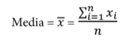

In [6]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3



N (o n) se refiere al número total de registros u observaciones. En estadística, se escribe con mayúscula si se refiere a una población y en minúscula si se refiere a una muestra de una población. En la ciencia de datos, esa distinción no es vital, por lo que se puede ver de las dos formas.

**Media Truncada (trimmed mean),** que se calcula ignorando un número fijo, en cada extremo, de valores ordenados y a continuación se calcula el promedio de los valores restantes. Al representar los valores ordenados por x(1), x(2), ..., x(n) donde x(1) es el valor más pequeño y x(n) el valor más grande, la fórmula para calcular la media recortada con los p valores más pequeños y más grandes omitidos es: 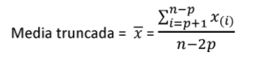

In [7]:
print(trim_mean(state['Population'], 0.1))

4783697.125


**Media Ponderada (weighted mean)**, que se calcula multiplicando cada valor de datos xi por el peso wi especificado por el usuario y dividiendo su suma por la suma de las ponderaciones. La fórmula para una media ponderada es: 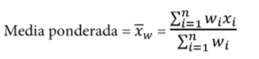


**La mediana (median)** es el valor central de una lista de datos ordenados de menor a mayor. Si hay un número par de valores de datos, el valor medio es uno que no está realmente en el conjunto de datos, sino el promedio de los dos valores que dividen los datos ordenados en mitades superior e inferior. En comparación con la media, que utiliza todas las observaciones, la mediana depende solo de los valores situados en el centro de los datos ordenados.

In [8]:
print(state['Population'].median())

4436369.5


La media ponderada está disponible con numpy. Para la mediana ponderada, podemos utilizar el paquete especializado `wquantiles` (https://pypi.org/project/wquantiles/).


In [9]:
print(state['Murder.Rate'].mean())

4.066


***Mediana ponderada***

Valor tal que la mitad de la suma de las ponderaciones se encuentra por encima y la otra
mitad por debajo de los datos ordenados.

In [10]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


**La mediana ponderada** es un valor tal que la suma de las ponderaciones es igual para las mitades inferior y superior de la lista ordenada. Como la mediana, la mediana ponderada es robusta a valores atípicos.

In [11]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


# **Percentiles y diagramas de caja**

Los percentiles también son útiles para extraer un resumen de toda la distribución.  Los percentiles son especialmente indicados para extraer el
resumen de las colas (tails) (partes de los extremos del rango) de la distribución

In [12]:
## Percentiles y diagramas de caja
#_Pandas_ tiene el método `cuantil` para marcos de datos.
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [13]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


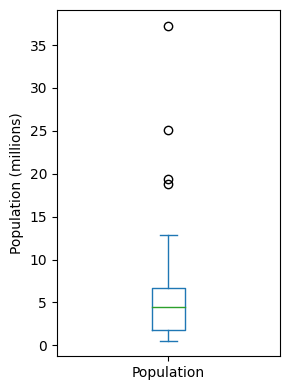

In [14]:
#_Pandas_ proporciona una serie de tramas exploratorias básicas; uno de ellos son diagramas de caja

ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

En este diagrama de caja, podemos ver de forma inmediata que la mediana de la población por estados es de alrededor de 5 millones, la mitad de los estados se encuentran entre aproximadamente 2 millones y 7 millones, y hay algunos valores atípicos de altos niveles de población.
Las líneas discontinuas, denominadas bigotes (whiskers), se extienden desde las partes superior e inferior del cuadro para indicar el rango de la mayor parte de los datos.

**Tabla de frecuencias e histogramas**
El método `cut` para los datos de _pandas_ divide el conjunto de datos en contenedores. Hay varios argumentos para el método. El siguiente código crea contenedores del mismo tamaño. El método `value_counts` devuelve una tabla de frecuencia.

In [15]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [16]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

**El histograma** es un modo de visualizar la tabla de frecuencias, con contenedores en el eje x y los valores de los datos en el eje y.
En general, los histogramas se representan gráficamente teniendo en cuenta que:

* Los contenedores vacíos se incluyen en el gráfico.
* Los contenedores tienen la misma anchura.
* El número de contenedores (o, de manera equivalente, el tamaño del contenedor) depende del usuario.
* Las barras son contiguas: no se muestran espacios vacíos entre las barras, a menos quehaya un contenedor vacío.

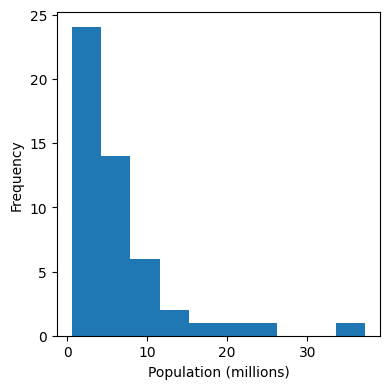

In [17]:
# _Pandas_ también admite histogramas para análisis de datos exploratorios.

ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

**Diagrama y estimación de la curva de densidad**

Relacionado con el histograma existe el diagrama de densidad, que muestra la distribución de los valores de los datos mediante una línea continua.

Un diagrama de densidad se puede considerar como un histograma suavizado, aunque normalmente se calcula directamente a partir de los datos a través de una estimación de la densidad del núcleo.

 Estimaciones de densidad
La densidad es una alternativa a los histogramas que puede proporcionar más información sobre la distribución de los puntos de datos. Utilice el argumento `bw_method` para controlar la suavidad de la curva de densidad.

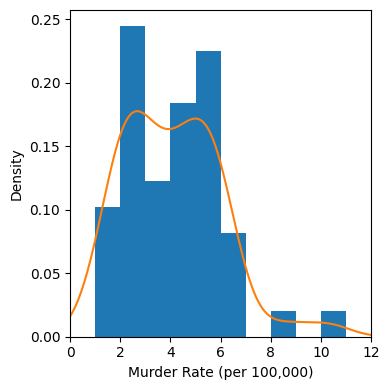

In [18]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()